In [1]:
import tensorflow as tf
import numpy as np
import math

In [2]:
pwd

'H:\\Desktop'

In [3]:
a = tf.ones((2,2))

In [4]:
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [5]:
print("TF Version:", tf.__version__)

TF Version: 2.6.0


In [6]:
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01] # # returns a dense multi-dimensional “meshgrid”

In [7]:
type(X[0][0])

numpy.float64

In [8]:
X

array([[-4.  , -4.  , -4.  , ..., -4.  , -4.  , -4.  ],
       [-3.99, -3.99, -3.99, ..., -3.99, -3.99, -3.99],
       [-3.98, -3.98, -3.98, ..., -3.98, -3.98, -3.98],
       ...,
       [ 3.97,  3.97,  3.97, ...,  3.97,  3.97,  3.97],
       [ 3.98,  3.98,  3.98, ...,  3.98,  3.98,  3.98],
       [ 3.99,  3.99,  3.99, ...,  3.99,  3.99,  3.99]])

In [9]:
Y

array([[-4.  , -3.99, -3.98, ...,  3.97,  3.98,  3.99],
       [-4.  , -3.99, -3.98, ...,  3.97,  3.98,  3.99],
       [-4.  , -3.99, -3.98, ...,  3.97,  3.98,  3.99],
       ...,
       [-4.  , -3.99, -3.98, ...,  3.97,  3.98,  3.99],
       [-4.  , -3.99, -3.98, ...,  3.97,  3.98,  3.99],
       [-4.  , -3.99, -3.98, ...,  3.97,  3.98,  3.99]])

In [10]:
X.shape

(800, 800)

In [11]:
Y.shape

(800, 800)

In [12]:
# Since these grids are fixed and constant upon execution of the graph, we use the constant definition
xs = tf.constant(X.astype(np.float32))
ys = tf.constant(Y.astype(np.float32))

In [13]:
# Compute Gaussian => e^-r2/sigma
zs = tf.exp(-(xs**2+ys**2)/2.0)

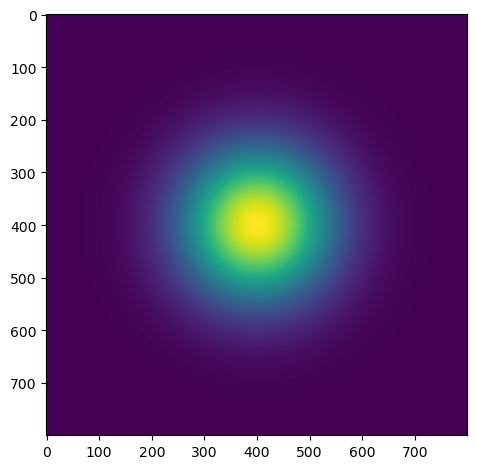

In [14]:
#plot
import matplotlib.pyplot as plt
plt.imshow(zs.numpy())
plt.tight_layout()
plt.show()

In [15]:
# Change Gaussian function into a 2D sine or cosine function
zs_cos = tf.math.cos(2*np.pi*1*xs)

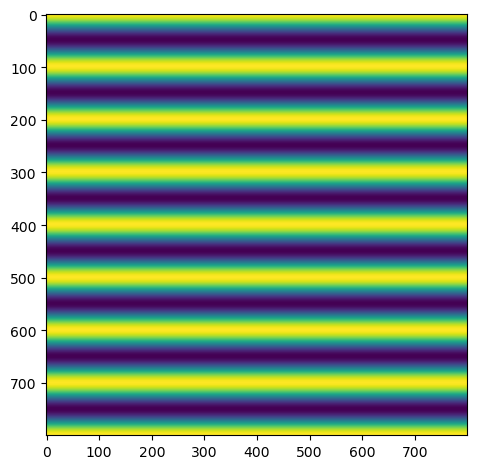

In [16]:
import matplotlib.pyplot as plt
plt.imshow(zs_cos.numpy())
plt.tight_layout()
plt.show()

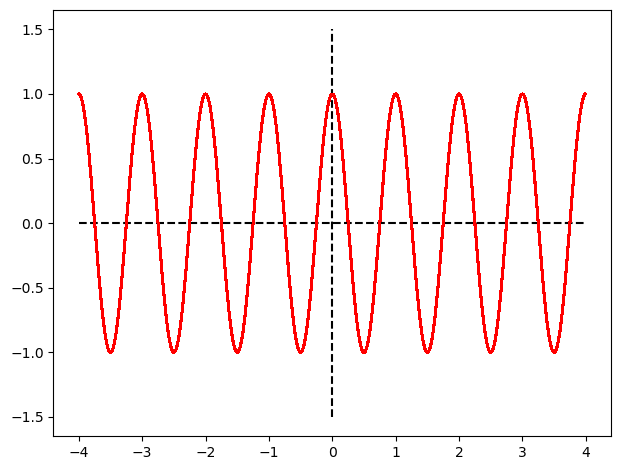

In [17]:
plt.plot(xs, zs_cos, color='red', label= 'cos')
plt.tight_layout()
plt.vlines(x=0, ymin = -1.5, ymax= 1.5, color='black', linestyle = "--" )
plt.hlines(y=0, xmin = -4, xmax= 4,  color='black', linestyle = "--"  )
plt.show()

## Gabor Filter:

* Gabor is a convolution filter representing a combination of gausian and a sinusoidal term. 

* The gausian component provides the weights and the sine component provides directionality.

* Gabor can be used to generate features that represent texture and edges.

In [18]:
zs = tf.exp(-(xs**2+ys**2)/2.0) # e^ -(r^2/sigma), where r = x^2 + y^2

In [19]:
zs_cos = tf.math.cos(2*np.pi*1*xs) # cos(2*pi*f*x')
# 𝑥′=𝑥cos𝜃+𝑦sin𝜃 where theta = 0 

In [20]:
z = zs * zs_cos 
# Element wise multiplication

In [21]:
z.shape

TensorShape([800, 800])

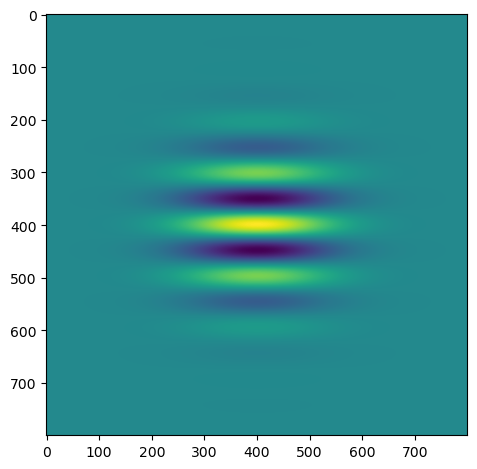

In [22]:
plt.imshow(z.numpy())
plt.tight_layout()
plt.show()
# Horizontal kernel

## Mandelbrot set:

* It is a set of complex numbers for which the orbit of Zn does not tend to infinity.

* Obtained from: Zn+1 = Zn^2 + c

* Here, image is generated from the number of steps required to reach |Zn| = 2 ==> Re{Zn}^2 + Im{Zn}^2 = 4

In [23]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005] # returns a dense multi-dimensional “meshgrid”
Z = X+1j*Y # Gives complex number Z = X + iY

In [24]:
Z.shape

(520, 600)

In [25]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float64))

In [26]:
for i in range(200):
    #Compute the new values of Zn+1: Zn^2 + x
    zs_ = zs*zs + xs
    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4
    # Update variables to compute
    ns.assign_add(tf.cast(not_diverged, tf.float64)) # Update ns by adding not_diverged (casted to float) to it.
    zs.assign(zs_) # Update zs by assigning zs_ to it.

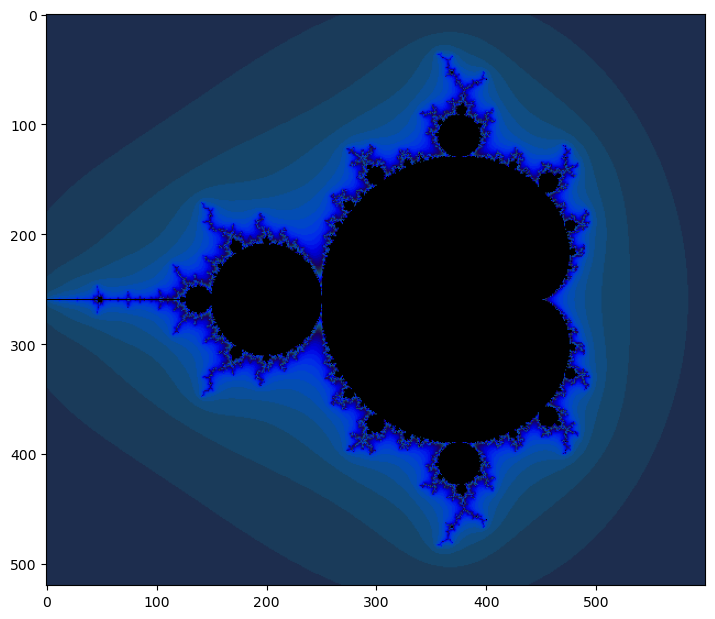

In [27]:
fig = plt.figure(figsize=(12, 6), dpi =100)
def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

In [28]:
# Y, X = np.mgrid[-1.15:-0.55:0.0005, -0.5:0.2:0.0005]
Y, X = np.mgrid[-0.05:0.05:0.0005, -1.8:-1.6:0.0005]
Z = X+1j*Y

In [29]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float64))

In [30]:
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + xs
    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4
    # Update variables to compute
    ns.assign_add(tf.cast(not_diverged, tf.float64))
    zs.assign(zs_)

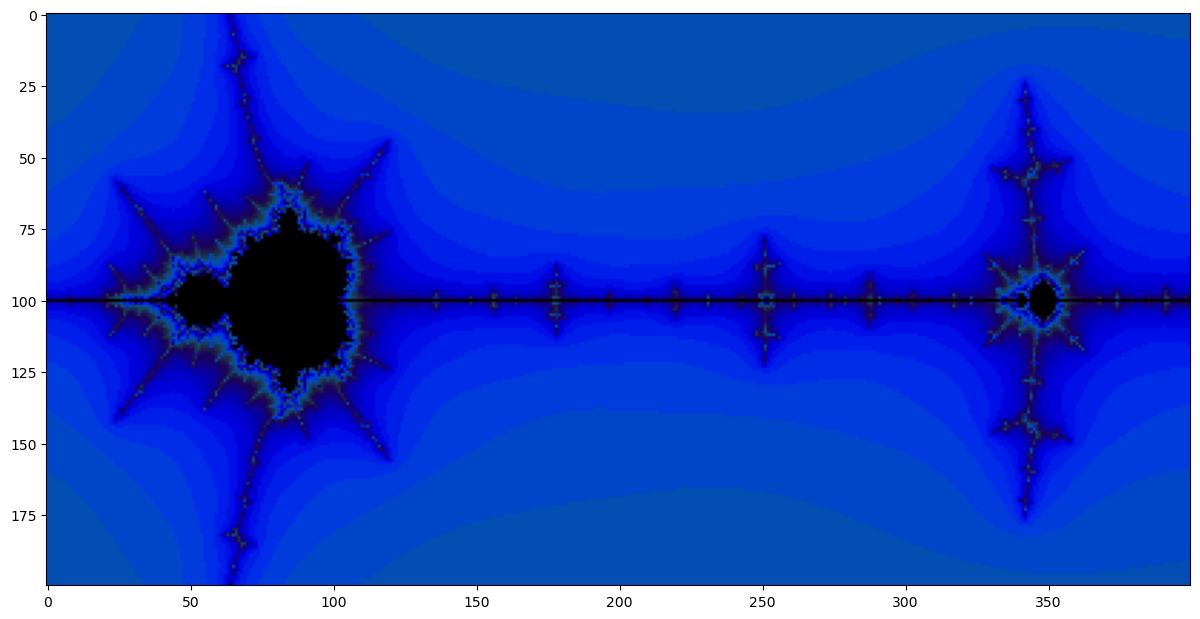

In [31]:
fig = plt.figure(figsize=(12, 6), dpi =100)
plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

## Julia Set:

In [32]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:2:0.005]
Z = X+1j*Y

In [33]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float64))

In [34]:
for i in range(200):
    # Filled Julia set
    # Compute the new values of z: z^2 + c where c= -1 + 0.1i
    zs_ = zs*zs + (-1 + 1j* 0.1)
    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4
    # Update variables to compute
    ns.assign_add(tf.cast(not_diverged, tf.float64))
    zs.assign(zs_)

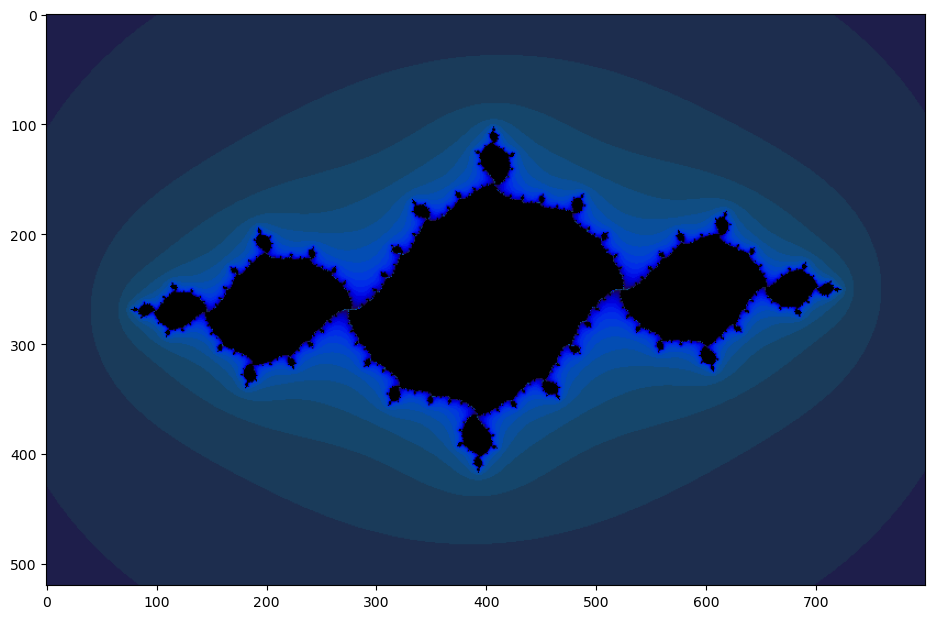

In [35]:
fig = plt.figure(figsize=(12, 6), dpi =100)
def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

## Gosper Curve (Flowsnake)

-Bill Gosper

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [58]:
# Using L-system (Instructions for drawing i.e.recurssion for text)
axiom = "A" # Gen zero
rule1 = "A-B--B+A++AA+B-"  # Rule 1
rule2 = "+A-BB--B-A++A+B"  # Rule 2

iterations = 3 # Number of iterations
count = 0 # Initial count
coordinates = [(0, -1), (0, 0)] 

In [59]:
coordinates[0]

(0, -1)

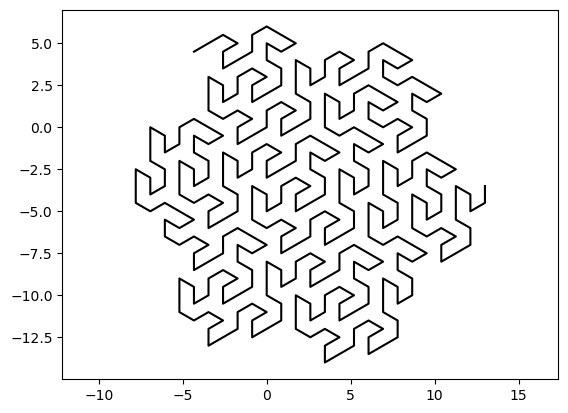

In [60]:
for x in range(iterations):

    last = len(coordinates)-1

    coordinates = [(coordinates[last]), coordinates[last-1]]

    substr = "" # Initializing string buffer
    
    for k in axiom:
        if k == "A":
            substr += rule1 # Replace "A" with rule 1
        elif k == "B":
            substr += rule2 # Replace "B" with rule 2
        else:
            substr += k # k = axiom

    stack = []

    for i in substr:

        if i == "+":
            stack.append(60) # turtle.right(60)
        elif i == "-":
            stack.append(-60) # turtle.left(60)
        else:
            if (i == "A" or i == "B") and count != 0:

                angle = 0
                
                for j in stack:
                    angle += j
                stack = []

                theta = np.radians(angle)
                
                # 2x2 orthogonal matrix => AA' = I
                # The below matrix gives the angle between 2 vectors => Rotation matrix

                R = np.array(((tf.cos(theta), -tf.sin(theta)),
                              (tf.sin(theta),  tf.cos(theta))))
                
                R = tf.constant(R.astype(np.float32))

                last = len(coordinates)-1

                line = np.array([coordinates[last][0]-coordinates[last-1]
                                 [0], coordinates[last][1]-coordinates[last-1][1]])
                
                line = tf.constant(line.astype(np.float32))

                vector = list(tf.tensordot(R, line, 1)) # Matrix multiplication 

                coordinates.append(
                    (coordinates[last][0]+vector[0], coordinates[last][1]+vector[1]))
            count += 1

    axiom = substr
    
plt.plot([i[0] for i in coordinates], [i[1] for i in coordinates], c="black") # Line plot for coordinates
plt.axis("equal") # Set equal scaling
plt.show()

In [61]:
print(axiom) #1

A-B--B+A++AA+B--+A-BB--B-A++A+B--+A-BB--B-A++A+B+A-B--B+A++AA+B-++A-B--B+A++AA+B-A-B--B+A++AA+B-++A-BB--B-A++A+B--+A-B--B+A++AA+B--+A-BB--B-A++A+B+A-BB--B-A++A+B--+A-BB--B-A++A+B-A-B--B+A++AA+B-++A-B--B+A++AA+B-++A-BB--B-A++A+B--+A-B--B+A++AA+B--+A-BB--B-A++A+B+A-BB--B-A++A+B--+A-BB--B-A++A+B-A-B--B+A++AA+B-++A-B--B+A++AA+B-++A-BB--B-A++A+B+A-B--B+A++AA+B--+A-BB--B-A++A+B--+A-BB--B-A++A+B+A-B--B+A++AA+B-++A-B--B+A++AA+B-A-B--B+A++AA+B-++A-BB--B-A++A+B-++A-B--B+A++AA+B--+A-BB--B-A++A+B--+A-BB--B-A++A+B+A-B--B+A++AA+B-++A-B--B+A++AA+B-A-B--B+A++AA+B-++A-BB--B-A++A+B-A-B--B+A++AA+B--+A-BB--B-A++A+B--+A-BB--B-A++A+B+A-B--B+A++AA+B-++A-B--B+A++AA+B-A-B--B+A++AA+B-++A-BB--B-A++A+B-++A-B--B+A++AA+B--+A-BB--B-A++A+B+A-BB--B-A++A+B--+A-BB--B-A++A+B-A-B--B+A++AA+B-++A-B--B+A++AA+B-++A-BB--B-A++A+B-


In [62]:
print(axiom) #2
# axiom = "A" 
# rule1 = "A-B--B+A++AA+B-"  
# rule2 = "+A-BB--B-A++A+B" 

A-B--B+A++AA+B--+A-BB--B-A++A+B--+A-BB--B-A++A+B+A-B--B+A++AA+B-++A-B--B+A++AA+B-A-B--B+A++AA+B-++A-BB--B-A++A+B--+A-B--B+A++AA+B--+A-BB--B-A++A+B+A-BB--B-A++A+B--+A-BB--B-A++A+B-A-B--B+A++AA+B-++A-B--B+A++AA+B-++A-BB--B-A++A+B--+A-B--B+A++AA+B--+A-BB--B-A++A+B+A-BB--B-A++A+B--+A-BB--B-A++A+B-A-B--B+A++AA+B-++A-B--B+A++AA+B-++A-BB--B-A++A+B+A-B--B+A++AA+B--+A-BB--B-A++A+B--+A-BB--B-A++A+B+A-B--B+A++AA+B-++A-B--B+A++AA+B-A-B--B+A++AA+B-++A-BB--B-A++A+B-++A-B--B+A++AA+B--+A-BB--B-A++A+B--+A-BB--B-A++A+B+A-B--B+A++AA+B-++A-B--B+A++AA+B-A-B--B+A++AA+B-++A-BB--B-A++A+B-A-B--B+A++AA+B--+A-BB--B-A++A+B--+A-BB--B-A++A+B+A-B--B+A++AA+B-++A-B--B+A++AA+B-A-B--B+A++AA+B-++A-BB--B-A++A+B-++A-B--B+A++AA+B--+A-BB--B-A++A+B+A-BB--B-A++A+B--+A-BB--B-A++A+B-A-B--B+A++AA+B-++A-B--B+A++AA+B-++A-BB--B-A++A+B-


In [42]:
print(axiom) #3

A-B--B+A++AA+B--+A-BB--B-A++A+B--+A-BB--B-A++A+B+A-B--B+A++AA+B-++A-B--B+A++AA+B-A-B--B+A++AA+B-++A-BB--B-A++A+B--+A-B--B+A++AA+B--+A-BB--B-A++A+B+A-BB--B-A++A+B--+A-BB--B-A++A+B-A-B--B+A++AA+B-++A-B--B+A++AA+B-++A-BB--B-A++A+B--+A-B--B+A++AA+B--+A-BB--B-A++A+B+A-BB--B-A++A+B--+A-BB--B-A++A+B-A-B--B+A++AA+B-++A-B--B+A++AA+B-++A-BB--B-A++A+B+A-B--B+A++AA+B--+A-BB--B-A++A+B--+A-BB--B-A++A+B+A-B--B+A++AA+B-++A-B--B+A++AA+B-A-B--B+A++AA+B-++A-BB--B-A++A+B-++A-B--B+A++AA+B--+A-BB--B-A++A+B--+A-BB--B-A++A+B+A-B--B+A++AA+B-++A-B--B+A++AA+B-A-B--B+A++AA+B-++A-BB--B-A++A+B-A-B--B+A++AA+B--+A-BB--B-A++A+B--+A-BB--B-A++A+B+A-B--B+A++AA+B-++A-B--B+A++AA+B-A-B--B+A++AA+B-++A-BB--B-A++A+B-++A-B--B+A++AA+B--+A-BB--B-A++A+B+A-BB--B-A++A+B--+A-BB--B-A++A+B-A-B--B+A++AA+B-++A-B--B+A++AA+B-++A-BB--B-A++A+B-
